In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('udemy_courses.csv')

### Casteando las columna published_timestamp de Object a Date

In [3]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [4]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

### Creando dos nuevas columnas published_Month y published_Year

In [5]:
df['published_Month'] = df['published_timestamp'].dt.month
df['published_Year'] = df['published_timestamp'].dt.year

In [6]:
df = df.drop(columns=['published_timestamp'])

### Analisis de valores nulos

In [7]:
result = pd.DataFrame()

In [8]:
for year_ in df.loc[ : , "published_Year" ].drop_duplicates():
    df_year = df.loc[ df['published_Year'] == year_ , : ]    
    for column_ in df_year.columns:        
        percentage =  np.sum(pd.isna( df_year.loc[ : , column_ ]  )) / df_year.shape[0]
        dfrow = pd.DataFrame({
            'year': [ year_ ]
            , 'column' : [ column_ ]
            , 'percentage.of.nans' : [ percentage ]
        })
        result = pd.concat([result, dfrow])

In [9]:
result

year            column  percentage.of.nans
0   2017         course_id                 0.0
0   2017      course_title                 0.0
0   2017               url                 0.0
0   2017           is_paid                 0.0
0   2017             price                 0.0
..   ...               ...                 ...
0   2011             level                 0.0
0   2011  content_duration                 0.0
0   2011           subject                 0.0
0   2011   published_Month                 0.0
0   2011    published_Year                 0.0

[91 rows x 3 columns]

In [10]:
df.isnull().sum()

course_id           0
course_title        0
url                 0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
published_Month     0
published_Year      0
dtype: int64

### Boxplots e Historigramas

#### Tamaño esperado de cada cuartil

In [11]:
3678/4

919.5

### Analizando la distribucion de datos para la columna price

{'whiskers': [<matplotlib.lines.Line2D at 0x1e28108e5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e28108eca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e28108e280>],
 'medians': [<matplotlib.lines.Line2D at 0x1e28109f3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e28109f700>],
 'means': []}

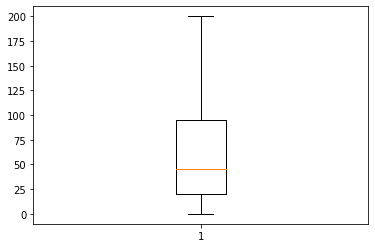

In [12]:
plt.boxplot(df["price"])

In [13]:
promedio_price = np.mean(df["price"])
promedio_price

66.0494834148994

In [14]:
mediana_price = np.median(df["price"])
mediana_price

45.0

#### No se observan valores atipicos

<AxesSubplot:>

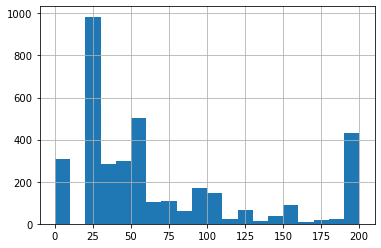

In [15]:
df["price"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de price

In [16]:
np.var(df.loc[0:919, "price"])

4373.78485349721

In [17]:
np.var(df.loc[920:1839, "price"])

3142.584002835529

In [18]:
np.var(df.loc[1840:2759, "price"])

3136.8364839319393

In [19]:
np.var(df.loc[2759:3678, "price"])

4058.4053727321125

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_subscribers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e281354b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e281360220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2813547c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2813608e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e281360c40>],
 'means': []}

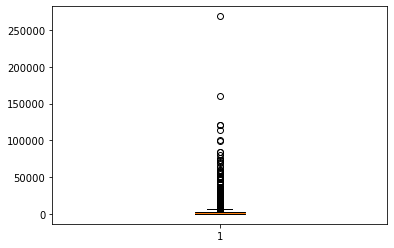

In [20]:
plt.boxplot(df["num_subscribers"])

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [21]:
p88_num_subscribers = np.quantile(df["num_subscribers"], .71 )
## p05_num_subscribers = np.quantile(df["num_subscribers"], .05 )

In [22]:
p88_num_subscribers

2091.67

In [23]:
promedio_num_subscribers = np.mean(df["num_subscribers"])
promedio_num_subscribers

3197.150625339859

In [24]:
mediana_num_subscribers = np.median(df["num_subscribers"])
mediana_num_subscribers

911.5

In [25]:
df.loc[ df["num_subscribers"] >= p88_num_subscribers , "num_subscribers" ] = mediana_num_subscribers
## df.loc[ df["num_subscribers"] <= p05_num_subscribers , "num_subscribers" ] = promedio_num_subscribers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2813d25e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2813d2ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2813d2280>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2813de3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2813de700>],
 'means': []}

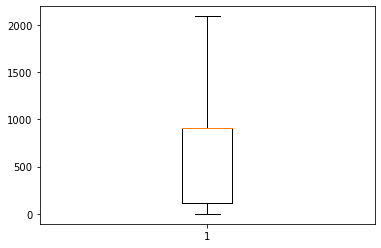

In [26]:
plt.boxplot(df["num_subscribers"])

#### No se observan valores atipicos

<AxesSubplot:>

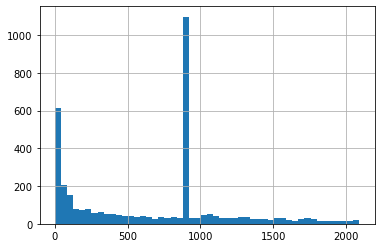

In [27]:
df["num_subscribers"].hist(bins = 50)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de num_subscribers

In [28]:
np.var(df.loc[0:919, "num_subscribers"])

300234.1575186087

In [29]:
np.var(df.loc[920:1839, "num_subscribers"])

270371.814224952

In [30]:
np.var(df.loc[1840:2759, "num_subscribers"])

274048.01342125516

In [31]:
np.var(df.loc[2759:3678, "num_subscribers"])

163555.42930409918

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_reviews

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2814ef2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2814ef9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2814e1f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2814fa0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2814fa400>],
 'means': []}

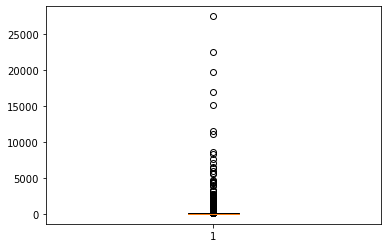

In [32]:
plt.boxplot(df["num_reviews"])

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [33]:
p86_num_reviews = np.quantile(df["num_reviews"], .66 )
##p05_num_reviews = np.quantile(df["num_reviews"], .05 )

In [34]:
p86_num_reviews

40.0

In [35]:
promedio_num_reviews = np.mean(df["num_reviews"])
promedio_num_reviews

156.25910821098424

In [36]:
mediana_num_reviews = np.median(df["num_reviews"])
mediana_num_reviews

18.0

In [37]:
df.loc[ df["num_reviews"] >= p86_num_reviews , "num_reviews" ] = mediana_num_reviews
## df.loc[ df["num_reviews"] <= p05_num_reviews , "num_reviews" ] = promedio_num_reviews

{'whiskers': [<matplotlib.lines.Line2D at 0x1e28154f0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e28154f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e281541cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e28154fe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e28155a1c0>],
 'means': []}

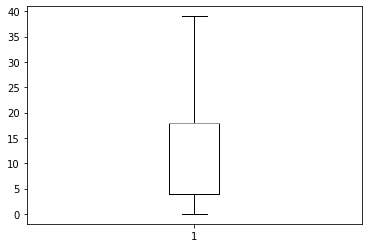

In [38]:
plt.boxplot(df["num_reviews"])

#### No se observan valores atipicos

<AxesSubplot:>

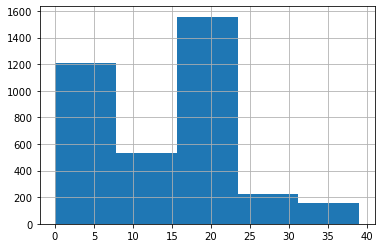

In [39]:
df["num_reviews"].hist(bins = 5)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de num_reviews

In [40]:
np.var(df.loc[0:919, "num_reviews"])

83.78032136105847

In [41]:
np.var(df.loc[920:1839, "num_reviews"])

88.7473050567107

In [42]:
np.var(df.loc[1840:2759, "num_reviews"])

84.87752244801521

In [43]:
np.var(df.loc[2759:3678, "num_reviews"])

45.63195553666368

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_lectures

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2825f95b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2825f9c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2825f9250>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2826033a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e282603700>],
 'means': []}

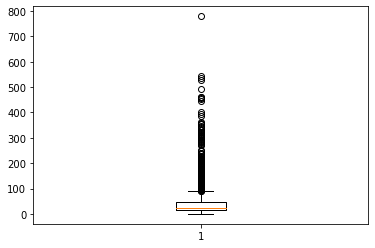

In [44]:
plt.boxplot(df["num_lectures"])

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [45]:
p89_num_lectures = np.quantile(df["num_lectures"], .71 )
## p05_num_lectures = np.quantile(df["num_lectures"], .05 )

In [46]:
p89_num_lectures

41.0

In [47]:
promedio_num_lectures = np.mean(df["num_lectures"])
promedio_num_lectures

40.108754758020666

In [48]:
mediana_num_lectures = np.median(df["num_lectures"])
mediana_num_lectures

25.0

In [49]:
df.loc[ df["num_lectures"] >= p89_num_lectures , "num_lectures" ] = mediana_num_lectures
## df.loc[ df["num_lectures"] <= p05_num_lectures , "num_lectures" ] = promedio_num_lectures

{'whiskers': [<matplotlib.lines.Line2D at 0x1e282660370>,
 'caps': [<matplotlib.lines.Line2D at 0x1e282660a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e282653fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e28266c130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e28266c490>],
 'means': []}

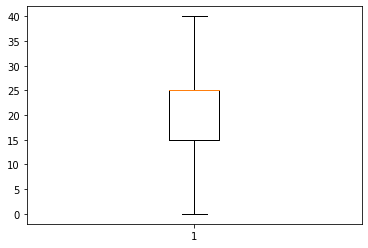

In [50]:
plt.boxplot(df["num_lectures"])

#### No se observan valores atipicos

<AxesSubplot:>

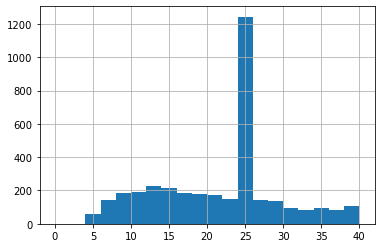

In [51]:
df["num_lectures"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la derecha

#### Varianza de num_lectures

In [52]:
np.var(df.loc[0:919, "num_lectures"])

70.48914815689987

In [53]:
np.var(df.loc[920:1839, "num_lectures"])

72.74279773156886

In [54]:
np.var(df.loc[1840:2759, "num_lectures"])

61.19768312854422

In [55]:
np.var(df.loc[2759:3678, "num_lectures"])

56.73706931766931

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna content_duration

{'whiskers': [<matplotlib.lines.Line2D at 0x1e282756ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2827653a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e282756940>],
 'medians': [<matplotlib.lines.Line2D at 0x1e282765a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e282765dc0>],
 'means': []}

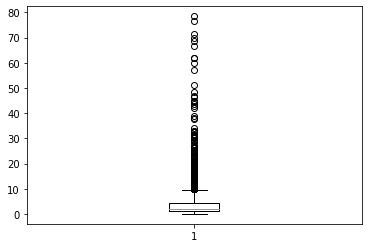

In [56]:
plt.boxplot(df["content_duration"])

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [57]:
p91_content_duration = np.quantile(df["content_duration"], .79 )
## p05_content_duration = np.quantile(df["content_duration"], .05 )

In [58]:
p91_content_duration

5.0

In [59]:
promedio_content_duration = np.mean(df["content_duration"])
promedio_content_duration

4.0945169476164605

In [60]:
mediana_content_duration = np.median(df["content_duration"])
mediana_content_duration

2.0

In [61]:
df.loc[ df["content_duration"] >= p91_content_duration , "content_duration" ] = mediana_content_duration
## df.loc[ df["content_duration"] <= p05_content_duration , "content_duration" ] = promedio_content_duration

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2827c29d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2827cf0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2827c2670>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2827cf790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2827cfaf0>],
 'means': []}

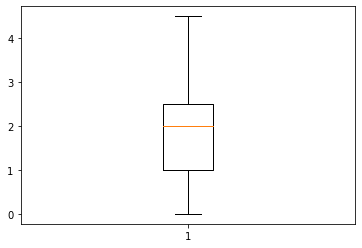

In [62]:
plt.boxplot(df["content_duration"])

#### No se observan valores atipicos

<AxesSubplot:>

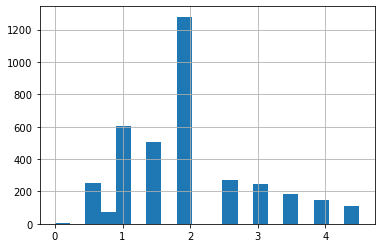

In [63]:
df["content_duration"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de content_duration

In [64]:
np.var(df.loc[0:919, "content_duration"])

0.8877383414723732

In [65]:
np.var(df.loc[920:1839, "content_duration"])

0.9379000574327905

In [66]:
np.var(df.loc[1840:2759, "content_duration"])

0.9362717650572396

In [67]:
np.var(df.loc[2759:3678, "content_duration"])

0.8852382848735698

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna published_Month

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2828b72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2828b7970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2828a9ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2828c2070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2828c23d0>],
 'means': []}

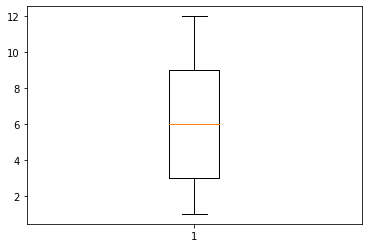

In [68]:
plt.boxplot(df["published_Month"])

#### No se observan valores atipicos

<AxesSubplot:>

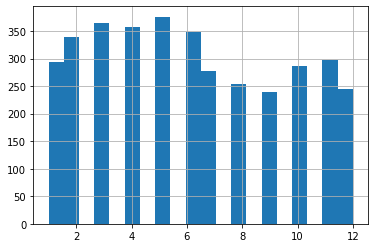

In [69]:
df["published_Month"].hist(bins = 20)

##### Los datos se comportan de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.

#### Varianza de published_Month

In [70]:
np.var(df.loc[0:919, "published_Month"])

11.545198487712678

In [71]:
np.var(df.loc[920:1839, "published_Month"])

10.869560491493383

In [72]:
np.var(df.loc[1840:2759, "published_Month"])

11.203095463138018

In [73]:
np.var(df.loc[2759:3678, "published_Month"])

11.959467699787101

##### En el boxplot se ven igualmente distribuidos los cuartiles
##### El historigrama se ve con forma rectangular
##### No hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna published_Year

{'whiskers': [<matplotlib.lines.Line2D at 0x1e28157f610>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2815836d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2815738e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e28158eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2815fda90>],
 'means': []}

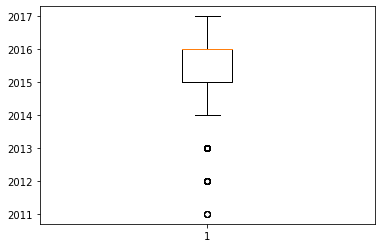

In [74]:
plt.boxplot(df["published_Year"])

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [75]:
## p90_published_Year = np.quantile(df["published_Year"], .90 )
p02_published_Year = np.quantile(df["published_Year"], .02 )

In [76]:
p02_published_Year = int(p02_published_Year)

In [77]:
p02_published_Year

2013

#### Se observan valores atipicos

<AxesSubplot:>

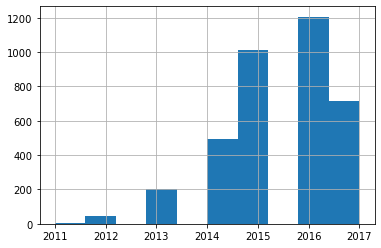

In [78]:
df["published_Year"].hist(bins = 10)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor
##### El histograma esta mas a la derecha

#### Varianza de published_Year

In [79]:
np.var(df.loc[0:919, "published_Year"])

1.3801878544423598

In [80]:
np.var(df.loc[920:1839, "published_Year"])

1.4325980623818373

In [81]:
np.var(df.loc[1840:2759, "published_Year"])

1.5534026465028452

In [82]:
np.var(df.loc[2759:3678, "published_Year"])

1.235697599107719

##### En el boxplot se ven igualmente distribuidos los cuartiles
##### El historigrama se ve con forma rectangular
##### No hace sentido tomarla como una variable numerica continua

### Correlaciones

In [83]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'subject', 'published_Month', 'published_Year'],
      dtype='object')

In [84]:
columns_to_use = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

#### Correlacion de Pearson

In [85]:
corr_use = df.loc[:, columns_to_use].corr()

In [86]:
corr_use

price  num_subscribers  num_reviews  num_lectures  \
price             1.000000         0.137494     0.173222      0.250106   
num_subscribers   0.137494         1.000000     0.511881      0.108731   
num_reviews       0.173222         0.511881     1.000000      0.203330   
num_lectures      0.250106         0.108731     0.203330      1.000000   
content_duration  0.163667         0.001640     0.120302      0.541020   

                  content_duration  
price                     0.163667  
num_subscribers           0.001640  
num_reviews               0.120302  
num_lectures              0.541020  
content_duration          1.000000

##### Obs: La definicion de multicolinealidad dice que hay dos variables que son en extremo correlacionadas (Correlacion igual a uno). Pudiendo borrar una variable sin afectacion

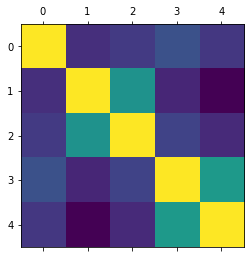

In [87]:
plt.matshow( corr_use )

<AxesSubplot:>

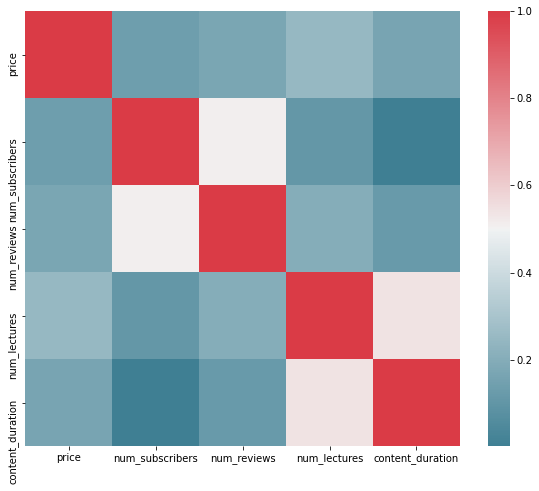

In [88]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap( corr_use, mask = np.zeros_like(corr_use, dtype = np.bool ), cmap = sns.diverging_palette(220, 10, as_cmap=True ), square = True , ax = ax)

##### Creando un objeto tipo grafico y de ejes

##### Como conclusion se puede decir que la columna conten_duration y num_lectures tienen una alta correlacion
##### No hay una correlacion muy marcada

### Grafico Scatter para ver la correlacion entre dos columnas

#### Para la columna num_subscribers y num_reviews

 ###### Obs. Emula una funcion matematica

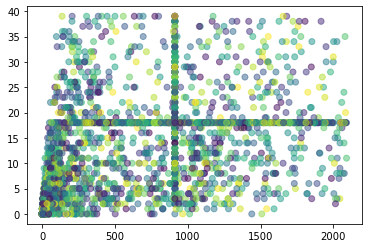

In [89]:
N = 3678
x_scatter_num_subscribers = df["num_subscribers"]
y_scatter_num_reviews = df["num_reviews"]
colors = np.random.rand(N)
## area = (30 * np.random.rand(N))**2

plt.scatter(x_scatter_num_subscribers, y_scatter_num_reviews, c = colors, alpha = 0.5)
plt.show()

##### Se ve dispersa
##### No se puede sacar ninguna conclusion

#### Grafico Scatter para la columna num_lectures y content_duration

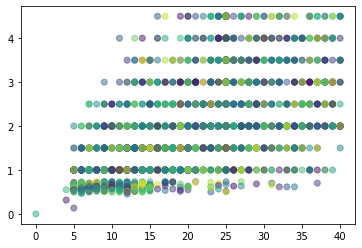

In [90]:
x_scatter_num_lectures = df["num_lectures"]
y_scatter_content_duration = df["content_duration"]
colors = np.random.rand(N)
## area = (30 * np.random.rand(N))**2

plt.scatter(x_scatter_num_lectures, y_scatter_content_duration, c = colors, alpha = 0.5)
plt.show()

##### Se ve dispersa 
##### No se puede sacar ninguna conclusion

### Principal Components Analysis (PCA)

##### Obs. Se refiere a la reduccion de dimensiones
##### Es un analisis no supervisado porque no hay etiquetas

In [91]:
columns_to_use = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

In [92]:
x = df.loc[:, columns_to_use].values

##### Idenficando las variables numericas

In [93]:
StandardScaler().fit_transform(x)

array([[ 2.19600149,  0.44580631,  1.04699917,  0.44759591, -0.4969714 ],
       [ 0.14673589,  0.44580631,  0.50393572,  0.44759591,  0.02478757],
       [-0.34508786,  0.44580631,  0.50393572,  0.44759591,  0.54654654],
       ...,
       [-0.42705848, -0.30147618,  0.50393572,  0.44759591,  1.59006447],
       [-0.26311723, -0.70090195,  1.9159007 ,  2.03794672,  1.0683055 ],
       [-0.34508786,  0.42611631,  2.45896416, -0.16407748,  0.02478757]])

##### Esta estandarizacion ayuda al momento de hacer las matrices de covarianza

In [94]:
pca = PCA( n_components=2 )

##### Empezamos a trabajar con matrices de covarianza
##### Tranformando de 10 columnas a 2 para visualizarlo de forma clara

In [95]:
principalComponents = pca.fit_transform(x)

In [96]:
pcadf = pd.DataFrame(data = principalComponents, columns=["c1", "c2"])

In [97]:
def print_scatter(df, x_label, y_label):
    N = 3678
    x = df[x_label]
    y = df[y_label]
    colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

    plt.scatter(x, y, c=colors, alpha=0.5)
    plt.show()

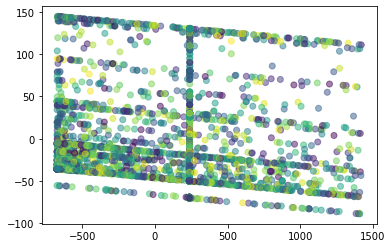

In [98]:
print_scatter(pcadf, "c1", "c2")

##### Se ve dispersa la informacion

### Clusters

In [99]:
pcadf = pd.DataFrame(data = principalComponents, columns=["c1", "c2"])

In [100]:
kmeans = KMeans( n_clusters=2 ).fit(pcadf)

##### Se crea un graficos con centroides y se ve como estan agrupados los datos
##### Las agrupaciones denotan que tienen las mismas caracteristicas
##### La clusterizacion sirve de complemento al analisis de PCA

In [101]:
centroids = kmeans.cluster_centers_
centroids

array([[-517.83831297,   -1.16082155],
       [ 407.62782653,    0.91376623]])

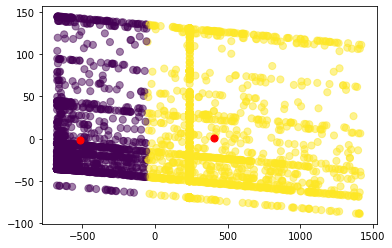

In [102]:
plt.scatter(pcadf["c1"], pcadf["c2"], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()

##### Posiblemente denota los cursos que pertencen a un grupo determinado

#### Cluster final con los nombres de las columnas

In [103]:
final_df = df.loc[ :, columns_to_use ]

In [104]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1])

##### Agregando una columna con las etiquetas de a que cluster pertenece

In [105]:
final_df["cluster"] = kmeans.labels_
final_df.cluster = final_df.cluster.astype(str)

In [106]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [107]:
fig = px.scatter(principalComponents, x=0, y=1, color=final_df["cluster"])

In [108]:
columns_to_use

['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

In [109]:
for i, feature in enumerate(columns_to_use):
    fig.add_shape( 
        type="line",
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature
    )
fig.show()

#### Con este grafico es mas facil sacar conclusiones de las correlaciones

In [110]:
final_df_cluster0 = final_df.loc[ final_df["cluster"] == "0", : ]
final_df_cluster1 = final_df.loc[ final_df["cluster"] == "1", : ]

In [111]:
final_df_cluster0.describe()

price  num_subscribers  num_reviews  num_lectures  \
count  1619.000000      1619.000000  1619.000000   1619.000000   
mean     56.575046       155.751699     8.201359     20.360716   
std      50.127672       172.819265     8.983103      8.651162   
min       0.000000         0.000000     0.000000      0.000000   
25%      20.000000        16.000000     1.000000     13.000000   
50%      40.000000        81.000000     5.000000     22.000000   
75%      60.000000       255.500000    14.000000     25.000000   
max     200.000000       618.000000    39.000000     40.000000   

       content_duration  
count       1619.000000  
mean           1.961015  
std            0.993569  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            2.500000  
max            4.500000

In [112]:
final_df_cluster1.describe()

price  num_subscribers  num_reviews  num_lectures  \
count  2059.000000      2059.000000  2059.000000   2059.000000   
mean     73.499271      1081.084264    17.416707     22.112190   
std      67.437524       328.106190     7.117181      7.695779   
min       0.000000       621.000000     0.000000      5.000000   
25%      20.000000       911.500000    17.000000     16.000000   
50%      50.000000       911.500000    18.000000     25.000000   
75%     110.000000      1192.500000    18.000000     25.000000   
max     200.000000      2091.000000    39.000000     40.000000   

       content_duration  
count       2059.000000  
mean           1.988222  
std            0.929931  
min            0.483333  
25%            1.500000  
50%            2.000000  
75%            2.000000  
max            4.500000

##### Se puenden comparar los dos grupos para hacer comparaciones entre las variables.
##### Una conlusion que se deberia sacar es que hay que enfocarse en una variable que afecta a las otras de un determinado grupo.
##### Que grupo de cursos anda bien y el otro no

### Machine Learning supervisado

#### Metodo de la regresion lineal

In [113]:
df.dtypes

course_id             int64
course_title         object
url                  object
is_paid                bool
price                 int64
num_subscribers     float64
num_reviews         float64
num_lectures        float64
level                object
content_duration    float64
subject              object
published_Month       int64
published_Year        int64
dtype: object

##### Definiendo la variable dependiente

###### Se desea calcular el num_lectures en funcion de content_duration
###### En este caso se busca alta interpretabilidad por sobre la precision

In [114]:
y = df.loc[:, "content_duration"].values
x = df.loc[:, ["num_lectures"]].values

##### Segmentando en un dataset de entrenamiento y de testeo

In [115]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=0.33, random_state=0 )

In [116]:
len(x)

3678

In [117]:
len(X_Train)

2464

In [118]:
len(X_Test)

1214

##### Objeto para correr la regresion lineal

In [119]:
regression = LinearRegression()

In [120]:
regression.fit(X_Train, Y_Train)

LinearRegression()

##### Los valores de X_Train andan cerce de los de Y_Train

In [121]:
regression.predict(X_Train)

array([2.19942783, 1.88638062, 2.19942783, ..., 1.13506733, 2.19942783,
       1.38550509])

In [122]:
Y_Train

array([2. , 1. , 2. , ..., 2. , 4.5, 1. ])

### Grafica para el entrenamiento

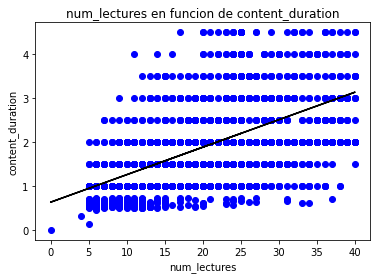

In [123]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = "blue")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("num_lectures en funcion de content_duration")
viz_train.xlabel("num_lectures")
viz_train.ylabel("content_duration")
viz_train.show()

### Grafica para el Test

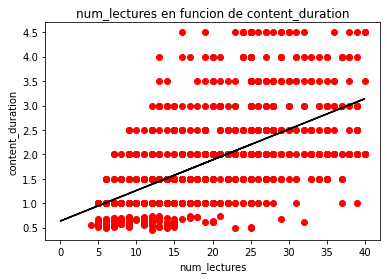

In [124]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = "red")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("num_lectures en funcion de content_duration")
viz_train.xlabel("num_lectures")
viz_train.ylabel("content_duration")
viz_train.show()

#### Precision

In [125]:
regression.score(X_Test, Y_Test)

0.3039580382398688

##### Se desea calcular el precio en funcion de Calidad del curso

In [126]:
df2 = df

In [127]:
df2["calidad_curso"] = df2["price"] * df2["num_reviews"]

In [128]:
y = df2.loc[:, "calidad_curso"].values
x = df2.loc[:, ["price"]].values

In [129]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=0.32, random_state=0 )

In [130]:
regression = LinearRegression()

In [131]:
regression.fit(X_Train, Y_Train)

LinearRegression()

### Grafica para el entrenamiento

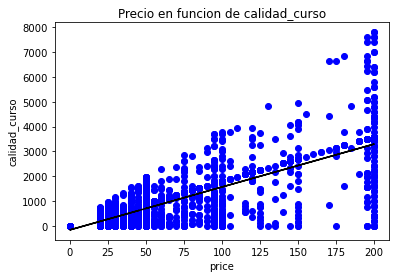

In [132]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = "blue")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("Precio en funcion de calidad_curso")
viz_train.xlabel("price")
viz_train.ylabel("calidad_curso")
viz_train.show()

### Grafica para el Test

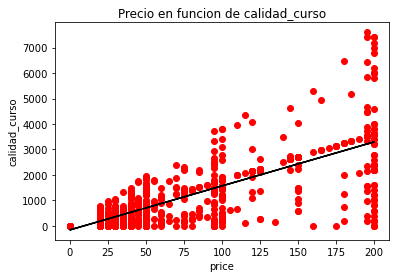

In [133]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = "red")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("Precio en funcion de calidad_curso")
viz_train.xlabel("price")
viz_train.ylabel("calidad_curso")
viz_train.show()

In [134]:
regression.score(X_Test, Y_Test)

0.6644658571183613

### Multiples regresiones

In [135]:
df3 = df

###### Se desea calcular el num_subscribers en funcion de num_reviews y num_lectures

In [136]:
y = df3.loc[:, ["content_duration", "price"]].values
x = df3.loc[:, ["num_lectures"]].values

In [137]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=0.3, random_state=0 )

In [138]:
regression = LinearRegression()

In [139]:
regression.fit(X_Train, Y_Train)

LinearRegression()

In [140]:
regression.score(X_Test, Y_Test)

0.18712129585763398

### Arboles de desicion

In [141]:
from sklearn import tree

##### Se desea predecir los valores de la columna is_paid en funcion de price, num_subscribers, num_reviews, num_lectures y content_duration

In [142]:
df_arbol = df

In [143]:
df_arbol.dtypes

course_id             int64
course_title         object
url                  object
is_paid                bool
price                 int64
num_subscribers     float64
num_reviews         float64
num_lectures        float64
level                object
content_duration    float64
subject              object
published_Month       int64
published_Year        int64
calidad_curso       float64
dtype: object

<AxesSubplot:>

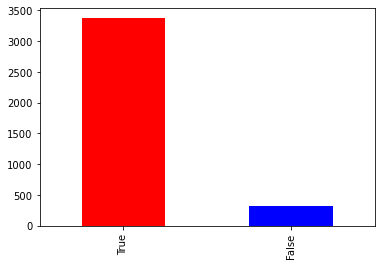

In [144]:
df_arbol.is_paid.value_counts().plot(kind="bar", color= ["r", "b"])

##### La variable de respuesta es is_paid

##### Grafico de cursos que son pagados

In [145]:
label_encoder = preprocessing.LabelEncoder()

In [146]:
encoder_s = label_encoder.fit_transform(df_arbol["is_paid"])

##### Se busca quedar solo con las variables dependientes

In [147]:
entrenamiento = df_arbol.drop(["is_paid", "course_id", "course_title", "url", "calidad_curso", "published_Month", "published_Year"], axis=1)

##### Buscando variables categoricas y numericas

In [148]:
categorical_col = [cname for cname in entrenamiento.columns if df_arbol[cname].dtype == "object"]
numericals_col = [cname for cname in entrenamiento.columns if df_arbol[cname].dtype != "object"]

In [149]:
categorical_col

['level', 'subject']

In [150]:
numericals_col

['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

In [151]:
mycols = categorical_col + numericals_col

In [152]:
dummy_encoded_train_predictors = pd.get_dummies( entrenamiento[mycols] )

##### Aumenta el numero de columnas por todas las categorias

In [153]:
dummy_encoded_train_predictors.head()

price  num_subscribers  num_reviews  num_lectures  content_duration  \
0    200            911.5         23.0          25.0               1.5   
1     75            911.5         18.0          25.0               2.0   
2     45            911.5         18.0          25.0               2.5   
3     95            911.5         11.0          36.0               3.0   
4    200           1276.0         18.0          26.0               2.0   

   level_All Levels  level_Beginner Level  level_Expert Level  \
0                 1                     0                   0   
1                 1                     0                   0   
2                 0                     0                   0   
3                 1                     0                   0   
4                 0                     0                   0   

   level_Intermediate Level  subject_Business Finance  subject_Graphic Design  \
0                         0                         1                       0   
1                         0                         1                       0   
2                         1                         1                       0   
3                         0                         1                       0   
4                         1                         1                       0   

   subject_Musical Instruments  subject_Web Development  
0                            0                        0  
1                            0                        0  
2                            0                        0  
3                            0                        0  
4                            0                        0

In [154]:
y_target = df_arbol["is_paid"].values
x = dummy_encoded_train_predictors.values

In [155]:
y_target

array([ True,  True,  True, ...,  True,  True,  True])

In [156]:
x

array([[200. , 911.5,  23. , ...,   0. ,   0. ,   0. ],
       [ 75. , 911.5,  18. , ...,   0. ,   0. ,   0. ],
       [ 45. , 911.5,  18. , ...,   0. ,   0. ,   0. ],
       ...,
       [ 40. , 513. ,  18. , ...,   0. ,   0. ,   1. ],
       [ 50. , 300. ,  31. , ...,   0. ,   0. ,   1. ],
       [ 45. , 901. ,  36. , ...,   0. ,   0. ,   1. ]])

In [157]:
X_Train, x_validation, Y_Train, y_validation = train_test_split( x, y_target, test_size=0.25, random_state=1 )

In [158]:
tree_one = tree.DecisionTreeClassifier()

In [159]:
tree_one = tree_one.fit(X_Train, Y_Train)

In [160]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation),4)
print("Accuracy: %0.4f" % (tree_one_accuracy))

Accuracy: 1.0000


In [161]:
from io import StringIO
from IPython.display import Image, display
import pydotplus
out = StringIO()
tree.export_graphviz(tree_one, out_file=out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("Cursos.png")

True

### Regresiones logisticas

In [162]:
from sklearn.linear_model import LogisticRegression

##### Se busca predecir si los cursos son pagados en funcion de price, num_subscribers, num_reviews, num_lectures y content_duration

In [163]:
df_log = df

In [164]:
df_log.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'subject', 'published_Month', 'published_Year',
       'calidad_curso'],
      dtype='object')

In [165]:
columns_to_use = ['price', 
                  'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

In [166]:
x = df_log[columns_to_use].values

In [167]:
y = df_log["is_paid"].values

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0 )

In [169]:
log_model = LogisticRegression(solver="lbfgs", max_iter = 1000)

In [170]:
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [171]:
y_pred = log_model.predict(X_test)

In [172]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

In [173]:
cnf_matrix

array([[  90,    0],
       [   0, 1014]], dtype=int64)

In [174]:
metrics.accuracy_score(Y_test, y_pred)

1.0

##### Predijo bien: 1014
##### Predijo mal: 90

### Validacion cruzada

###### Se desea predecir num_reviews en funcion de content_duration

In [175]:
X = df["num_reviews"]
Y = df["content_duration"]

In [176]:
kf = KFold(n_splits=2, shuffle=True, random_state=2)

In [177]:
for valores_x, valores_y in kf.split(X):
    print(valores_x,valores_y)
    #print("Training: " , df.iloc[values_x], "Test: ", df.iloc[values_y])

[   0    1    2 ... 3673 3674 3677] [   3    4    6 ... 3670 3675 3676]
[   3    4    6 ... 3670 3675 3676] [   0    1    2 ... 3673 3674 3677]


In [178]:
regr=linear_model.LinearRegression()

In [179]:
for train_indice, test_indice in kf.split(x):
    print("Training :", train_indice ,"Testing :", test_indice)
    x_Training, x_Test= x[train_indice],x[test_indice]
    y_Training, y_Test= y[train_indice],y[test_indice]
   # x_Training= x_Training.values.reshape([x_Training.values.shape[0],1])
   # x_Test= x_Test.values.reshape([x_Test.values.shape[0],1])
    regr.fit(x_Training, y_Training)
    y_pred=regr.predict(x_Test)
    print("valores predictivos :" ,y_pred)
    print("Error:", mean_squared_error(y_Test, y_pred))
    print("El valor de r^2: ", r2_score(y_Test, y_pred))

Training : [   0    1    2 ... 3673 3674 3677] Testing : [   3    4    6 ... 3670 3675 3676]
valores predictivos : [0.99770444 1.06063373 0.85006226 ... 0.83655522 0.89237212 0.9132151 ]
Error: 0.06916791537835512
El valor de r^2:  0.17988267090088583
Training : [   3    4    6 ... 3670 3675 3676] Testing : [   0    1    2 ... 3673 3674 3677]
valores predictivos : [1.09559727 0.89817463 0.84266966 ... 0.94565923 0.93082786 0.7212813 ]
Error: 0.06011398220394695
El valor de r^2:  0.13964985692274856


##### El R-cuadrado siempre está entre 0 y 100%:

##### 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
##### 100%   indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.